In [1]:
import numpy as np
import scipy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt
import nb_general as nb

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


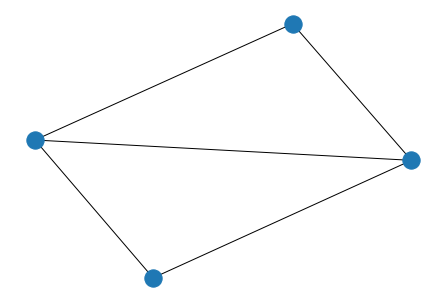

In [2]:
G = nx.Graph([[1,2],[2,3],[3,4],[4,1],[2,4]])
nx.draw(G)
plt.show()

In [3]:
A = nx.adjacency_matrix(G).todense()
C, B, tau = nb.to_edge_space(G,B=True,graph=False,ret_tau=True)
D = np.diag(list(dict(G.degree()).values()))
I = np.eye(D.shape[0])
K = np.block([[A,D-I],[-I,np.zeros_like(D)]])

In [4]:
K_inv = np.block([[np.zeros_like(D),-I],[la.solve(D-I,I),la.solve(D-I,I)@A]])

In [5]:
bvals, bvecs = la.eig(B)
bvecs = bvecs[:,np.argsort(bvals)]
bvals = np.sort(bvals)

In [6]:
kvals, kvecs = la.eig(K)
kvecs = kvecs[:,np.argsort(kvals)]
kvals = np.sort(kvals)

In [7]:
ivals, ivecs = la.eig(K_inv)
ivecs = ivecs[:,np.argsort(ivals)]
ivals = np.sort(ivals)

In [8]:
S, T = nb.create_s_t(G)
proj = np.block([S,T.T])

In [20]:
# Compare with stationary distribution
trans = la.solve(D-I,I)@A

In [21]:
la.eig(trans)

(array([ 1.68614066e+00+0.j,  6.51469980e-17+0.j, -1.18614066e+00+0.j,
        -5.00000000e-01+0.j]),
 array([[ 5.40616748e-01,  7.07106781e-01,  6.08190508e-01,
          1.04672831e-16],
        [ 4.55777941e-01,  6.28319493e-18, -3.60699746e-01,
         -7.07106781e-01],
        [ 5.40616748e-01, -7.07106781e-01,  6.08190508e-01,
          1.04672831e-16],
        [ 4.55777941e-01,  8.99370036e-18, -3.60699746e-01,
          7.07106781e-01]]))

In [27]:
ivecs[len(ivecs)//2:,4]

array([-5.00000000e-01-1.38777878e-16j, -1.39298097e-16-1.93589761e-16j,
        5.00000000e-01-0.00000000e+00j, -1.72061438e-16-7.27528061e-17j])

In [28]:
ivecs[len(ivecs)//2:,5]

array([-5.00000000e-01+1.38777878e-16j, -1.39298097e-16+1.93589761e-16j,
        5.00000000e-01+0.00000000e+00j, -1.72061438e-16+7.27528061e-17j])

In [30]:
ivals[4]

(-4.163336342344337e-16-0.9999999999999989j)

In [31]:
ivals

array([-5.78649053e-01-0.65257576j, -5.78649053e-01+0.65257576j,
       -2.50000000e-01-0.66143783j, -2.50000000e-01+0.66143783j,
       -4.16333634e-16-1.j        , -4.16333634e-16+1.j        ,
        6.57298106e-01+0.j        ,  1.00000000e+00+0.j        ])

In [33]:
kvals

array([-7.60689853e-01-0.85787363j, -7.60689853e-01+0.85787363j,
       -5.00000000e-01-1.32287566j, -5.00000000e-01+1.32287566j,
       -2.22044605e-16-1.j        , -2.22044605e-16+1.j        ,
        1.00000000e+00+0.j        ,  1.52137971e+00+0.j        ])